In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading
names1 = ["xxxxxx"]
names2 = ["zzzzzz"]
df1 = pd.read_csv("linearX.csv", names = names1)
df2 = pd.read_csv("linearY.csv", names = names2)
x = df1["xxxxxx"].values.reshape(-1,1)
y = df2["zzzzzz"].values

In [44]:
# Processing
x = (x - x.mean()) / x.std();
x = np.c_[np.ones(x.shape[0]),x]

In [45]:
### Hyperparameters
learning_rate = 0.5
iterations = 1000
conv_thres = 1e-6

In [46]:
# Training

def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = x.dot(theta)
        errors = predictions - y
        theta = theta - (learning_rate / m) * x.T.dot(errors)
        cost_history.append(cost_function(x, y, theta))

    return theta, cost_history

theta, cost_history = gradient_descent(x, y, np.zeros(x.shape[1]), learning_rate, iterations)

In [47]:
# Convergence Check
converged = False
for i in range(1, len(cost_history)):
    if abs(cost_history[i] - cost_history[i - 1]) < conv_thres:
        converged = True
        print(f"Converged after {i} iterations.")
        break

if not converged:
    print("Did not converge within the specified iterations.")

Converged after 10 iterations.


In [48]:
# Result
print("Learning Parameter i.e Theta:", theta)
print("Final Cost function value:", cost_history[-1])

Learning Parameter i.e Theta: [0.9966201 0.0013402]
Final Cost function value: 1.1947898109836605e-06


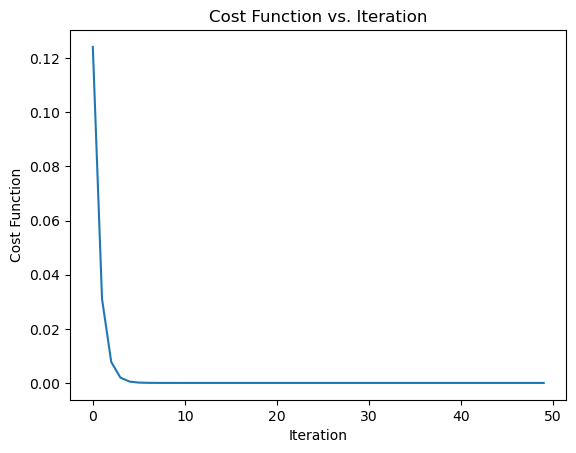

In [49]:
#  Cost vs. iteration
plt.plot(range(50), cost_history[:50])
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iteration")
plt.show()

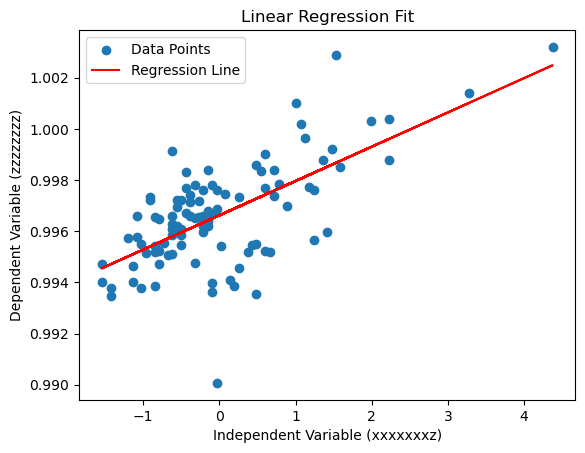

In [50]:
# Regression line
plt.scatter(x[:, 1], y, label="Data Points")  # Original X 
plt.plot(x[:, 1], x.dot(theta), color='red', label="Regression Line")
plt.xlabel("Independent Variable (xxxxxxxz)")
plt.ylabel("Dependent Variable (zzzzzzzz)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

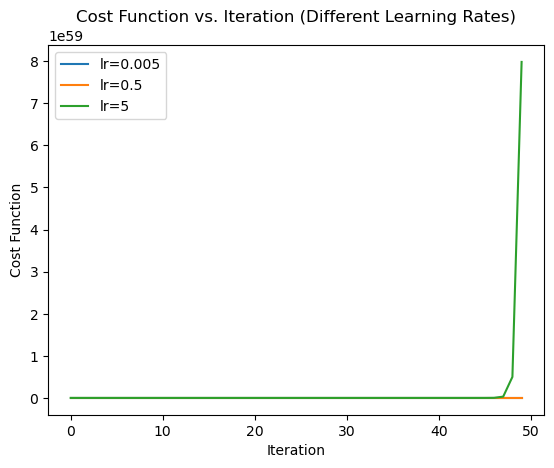

In [51]:
# --- Experiments with different learning rates ---
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    _, cost_history = gradient_descent(x, y, np.zeros(x.shape[1]), lr, 50)
    plt.plot(range(50), cost_history, label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iteration (Different Learning Rates)")
plt.legend()
plt.show()


In [52]:
# Stochastic and Mini-batch gradient descent 
learning_rate = 0.01
iterations = 1000
batch_size = 32  

def stochastic_gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        random_index = np.random.randint(0, m)
        xi = x[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        predictions = xi.dot(theta)
        errors = predictions - yi
        theta = theta - learning_rate * xi.T.dot(errors) 
        cost_history.append(cost_function(x, y, theta)) 

    return theta, cost_history

def mini_batch_gradient_descent(x, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)[:batch_size]
        x_batch = x[indices]
        y_batch = y[indices]

        predictions = x_batch.dot(theta)
        errors = predictions - y_batch
        theta = theta - (learning_rate / batch_size) * x_batch.T.dot(errors)
        cost_history.append(cost_function(x, y, theta))

    return theta, cost_history


# Stochastic GD
theta_sgd, cost_history_sgd = stochastic_gradient_descent(x, y, np.zeros(x.shape[1]), learning_rate, iterations)

#  Mini-Batch GD
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(x, y, np.zeros(x.shape[1]), learning_rate, iterations, batch_size)

theta_bgd, cost_history_bgd = gradient_descent(x, y, np.zeros(x.shape[1]), learning_rate, iterations)


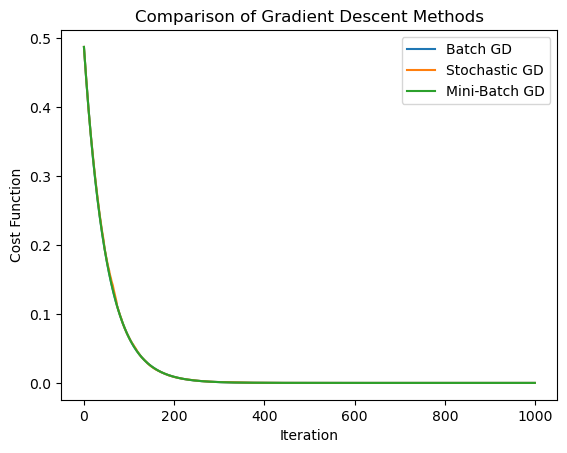

In [53]:
# Plotting 
plt.plot(range(iterations), cost_history_bgd, label="Batch GD") # Change cost_history to cost_history_bgd
plt.plot(range(iterations), cost_history_sgd, label="Stochastic GD")
plt.plot(range(iterations), cost_history_mbgd, label="Mini-Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()